In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import napari

import sys
sys.path.append(r'../')

from tools import imgLoad
from SegTools import Blocks, Segmentation

%gui qt


# Load data

In [2]:
basedir = r'Y:\People\Yannan\Segmentation\DrugTH10_30mgkg\CKet11823'
probTH = imgLoad.loadVirtualTifSeq(basedir + r'\regionSpecificTraining\lowFPProb\*.tif')
imgTH = imgLoad.loadVirtualTifSeq(basedir + r'\data\*.tif')

masks = [imgLoad.loadVirtualTifSeq(r'W:\People\Yannan\Segmentation\DF16\regionalMask\aroundHind\mask\*.tif'),
        ]

(5568, 3960, 1140)
(5568, 3960, 1140)
(5568, 3960, 1140)


# Set blocks

Block Number (x,y,z):  [6 5 5]


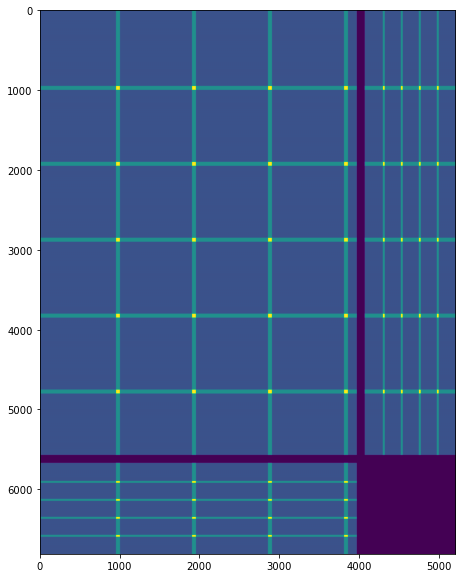

In [3]:
blocks = Blocks(probTH.shape, (1000, 1000, 250), (50, 50, 25))
blocks.visualize()

In [4]:
segObj = Segmentation(imgTH, probTH, masks, blocks)

# Tune thresholds

In [10]:
# (3,0,1),(3,1,1),(4,1,2), (4,1,0)
thresholds = [0.02, 0.2]
blobs = segObj.segmentBlock([3,0,1], thresholds, onlyMask = False, min_sigma = [3, 3, 1], max_sigma = [5,5,5])

Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0


In [29]:

viewer = napari.view_image(segObj.blockImg, contrast_limits=[0,800], colormap = 'gray', order = [0,1,2], name = 'Img')
viewer.add_image(segObj.blockProb, contrast_limits=[0,255], colormap = 'red', blending = 'additive', name = 'Prob')
viewer.add_image(segObj.blockMasks[0], contrast_limits=[0,1], colormap = 'green', blending = 'additive', opacity = 0.3, name = 'Mask')
viewer.add_points(np.array([blobs.x, blobs.y, blobs.z]).T, size = 4, n_dimensional = True, face_color = 'red', name = 'colocal')


<Points layer 'colocal' at 0x1e9cc3fd670>

# Run segmentation

In [5]:
thresholds = [0.02, 0.2]


allBlobs = segObj.segmentWhole(basedir, thresholds, onlyMask = False, min_sigma = [3, 3, 1], max_sigma = [5,5,5], \
                            paramFile = 'sparseBlobParam')
allBlobs.to_csv(basedir + r'\results.csv')


Create  Y:\People\Yannan\Segmentation\DrugTH10_30mgkg\CKet11823\blocks
Exists  Y:\People\Yannan\Segmentation\DrugTH10_30mgkg\CKet11823\parameters

===
Block:  0 0 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0

===
Block:  1 0 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0

===
Block:  2 0 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 2

===
Block:  3 0 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 3

===
Block:  4 0 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 1

===
Block:  5 0 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0

===
Block:  0 1 0
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 4

===
Block:  1 1 0
Load data...
Blob detection (Mask 1)...
Detection: 

Detection: 0
Blob detection (Mask 2)...
Detection: 26

===
Block:  0 2 2
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 62

===
Block:  1 2 2
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 62

===
Block:  2 2 2
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 5

===
Block:  3 2 2
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 255

===
Block:  4 2 2
Load data...
Blob detection (Mask 1)...
Detection: 176
Blob detection (Mask 2)...
Detection: 205

===
Block:  5 2 2
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 36

===
Block:  0 3 2
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 1

===
Block:  1 3 2
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 10

===
Block:  2 3 2
Load data...
Blob det

Detection: 0

===
Block:  1 4 4
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0

===
Block:  2 4 4
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0

===
Block:  3 4 4
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0

===
Block:  4 4 4
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0

===
Block:  5 4 4
Load data...
Blob detection (Mask 1)...
Detection: 0
Blob detection (Mask 2)...
Detection: 0


In [6]:
# allBlobs = segObj.loadBlockResults(basedir)
# allBlobs.to_csv(basedir + r"\results.csv")
allBlobs

,x,y,z,rx,ry,rz,mask
0,2571.0,647.0,116.0,2.0,2.0,1.0,2.0
1,2270.0,562.0,226.0,2.0,2.0,1.0,2.0
1,3566.0,939.0,52.0,2.0,2.0,1.0,2.0
2,3697.0,817.0,231.0,2.0,2.0,1.0,2.0
0,695.0,1588.0,186.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...
2,4971.0,2512.0,935.0,2.0,2.0,1.0,2.0
0,2557.0,3127.0,999.0,2.0,2.0,1.0,2.0
1,2215.0,3169.0,919.0,2.0,2.0,1.0,2.0
6,3894.0,2958.0,950.0,2.0,2.0,1.0,2.0


In [196]:
%gui qt

viewer = napari.view_image(imgTH, contrast_limits=[0,10000], colormap = 'gray',  scale = [1,1,2], name = 'Img')
viewer.add_points(np.array([allBlobs.x, allBlobs.y, allBlobs.z*2]).T, size = 15,\
                  symbol='ring', edge_width=0, \
                  n_dimensional = True, face_color = 'red', name = 'Cells')



<Points layer 'Cells' at 0x1fa7c5e2850>